### Intro to geopandas: The very basics

- Fundamentals
- Basic choropleth plots
- Centroids and projections
- Points and polygons

<img src="geopanda_pic.png" alt="drawing" style="width:200px;"/>

### Load the library, create and environment if needed

- Load as gpd as below...
- May need to create an new environment to use geopandas...
- To create a new environment:

In [3]:
#To make a new environment and install packages in the terminal:
#Uncomment if you actually want to do this

#conda create -n my_env
#conda activate my_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install <my_package>


In [4]:
#Now load geopandas plus other standard libraries
#####

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import geopandas as gpd

### Basic geopandas: First let's load some very basic Natural Earth data

In [5]:
#First, load the basic data from Natural Earth
#Can get many other local or remote datasets, start with this...
#"gdf" is a common generic variable name = GeoDataFrame
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Note that geopandas has three built-in datasets that you can use to test with
#Check using this command:
display(gpd.datasets.available)

#And now let's display the GeoDataFrame using the head() method
#Many of the same Pandas methods, etc. for DataFrames work with GeoDataFrames

display(gdf.head())

#Could also show the last five
#gdf.tail()

#Or, say, the first 15:
#gdf.head(15)

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

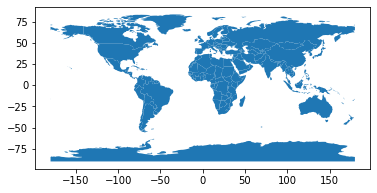

In [6]:
#And for the most basic of plots...
gdf.plot()

In [6]:
#Before more plotting, recall again basic indexing/slicing methods:
#For label-based access, use loc
#Also note, use the double [[]] to get a DataFrame with a single index; just [] returns a Series
display(gdf.loc[[0]])

display(gdf.loc[0:2])


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


<AxesSubplot:>

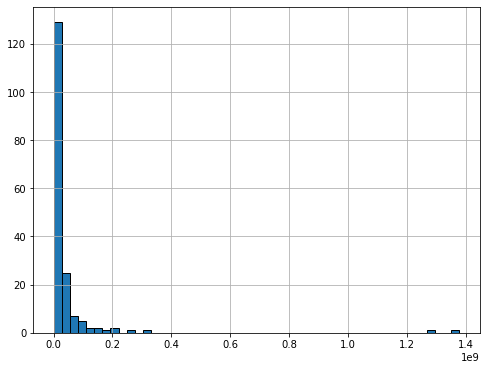

In [7]:
#Note that we can use the same pandas plotting stuff:
####

#Do a quick histogram of population:
fig1, ax1 = plt.subplots(1, 1, figsize=(8,6))

gdf['pop_est'].hist(ax = ax1, bins = 50, edgecolor='black')


<AxesSubplot:ylabel='Frequency'>

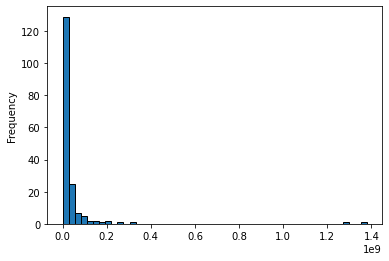

In [8]:
#Could also do:

gdf['pop_est'].plot(kind='hist', bins = 50, edgecolor='black')

In [9]:
#What are our apparent outliers?
gdf.sort_values(by='pop_est', ascending=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
...,...,...,...,...,...,...
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."


#### Can also do pandas plot methods with geopandas:
Use *`kind`* keyword argument with `plot()` method. Recall options:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots


C:\Users\Steffen\miniconda3\envs\geo_env\lib\site-packages\pandas\plotting\_matplotlib\hist.py:354: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


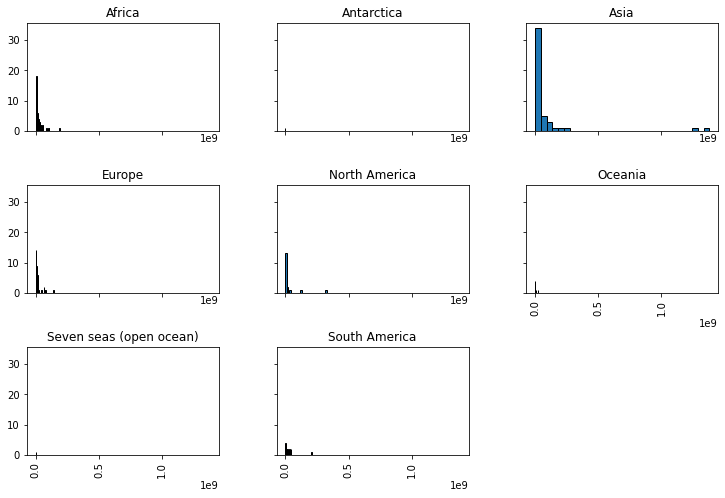

In [15]:
#Do population histograms by continent:
######

fig1, ax1 = plt.subplots(1, 1, figsize=(12,8))

gdf['pop_est'].hist(ax = ax1, bins = 30, edgecolor='black',
                    by=gdf.continent, sharex=True, sharey=True, grid=False);

C:\Users\Steffen\miniconda3\envs\geo_env\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


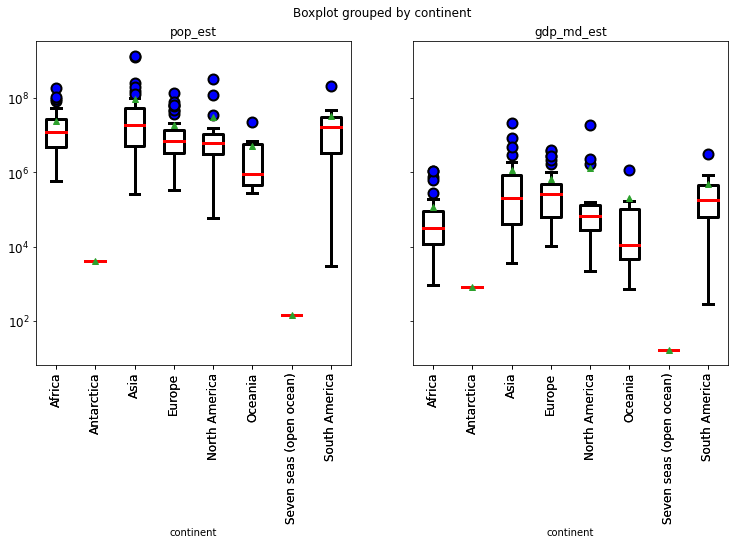

In [16]:
#Can also do boxplots, etc.:

#Set up our properties...
boxprops = dict(linewidth = 3, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth=3, color='black')
boxprops = dict(linewidth = 3, color = 'black')
capprops = dict(linewidth = 3, color = 'black')
flierprops = dict(markersize=10, markeredgewidth=2, markeredgecolor='black', markerfacecolor='blue')
medianprops = dict(linewidth = 3, color = 'red')

#And plot!
##########
fig1, ax1 = plt.subplots(1, 1, figsize=(12,6))

#Do both pop_est and gdp_md_est
ax2, ax3 = gdf.boxplot(column = ["pop_est", "gdp_md_est"], by = "continent", ax = ax1, showmeans=True, 
            boxprops = boxprops,
            whiskerprops = whiskerprops,
            capprops = capprops,
            flierprops = flierprops,
            medianprops = medianprops,
            rot = 90, grid=False, fontsize=12);

#Try with vs. without log scale
ax3.set_yscale('log');


### Some Basic “Choropleth” Plots!

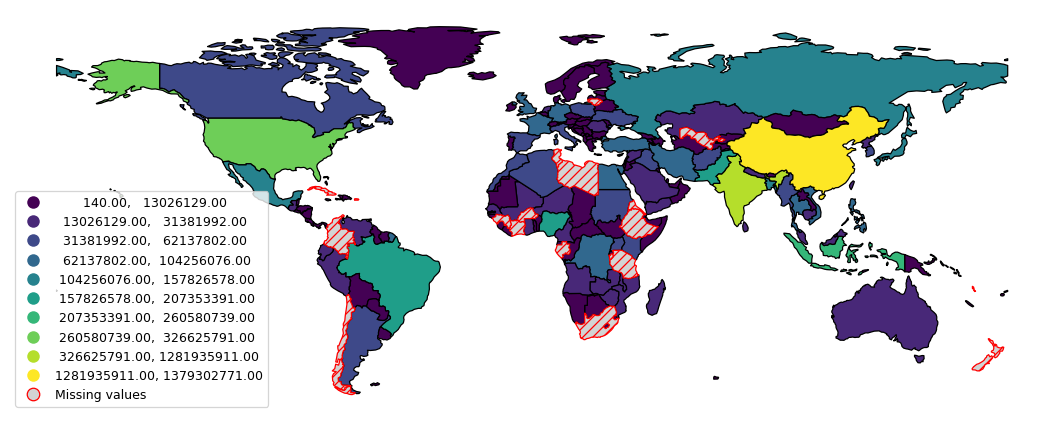

In [7]:
#Let's plot with some random counties NaNed
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

#Reload as "world":
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
world = world.loc[world.continent != 'Antarctica']


#Take 20 countries, set population to nan
world.loc[np.random.choice(world.index, 20), 'pop_est'] = np.nan


fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

#Note: scheme + k
#edgecolor: "black", etc. vs. "face"
#missing_kwds, legend, and legend_kwds

world.plot(ax=ax1, scheme="fisherjenks", k = 10, column = 'pop_est', linewidth = 1, edgecolor = 'black',
           missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
           legend = True, legend_kwds={'loc': 'lower left'}) 


#Set some axis stuff
#ax1.get_xaxis().set_ticks([])
#ax1.get_yaxis().set_ticks([])

#Or could just:
ax1.set_axis_off();


In [23]:
#Note Antarctica: Has a non-zero/non-NaN population and gdp:
gdf.loc[gdf.continent=='Antarctica']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


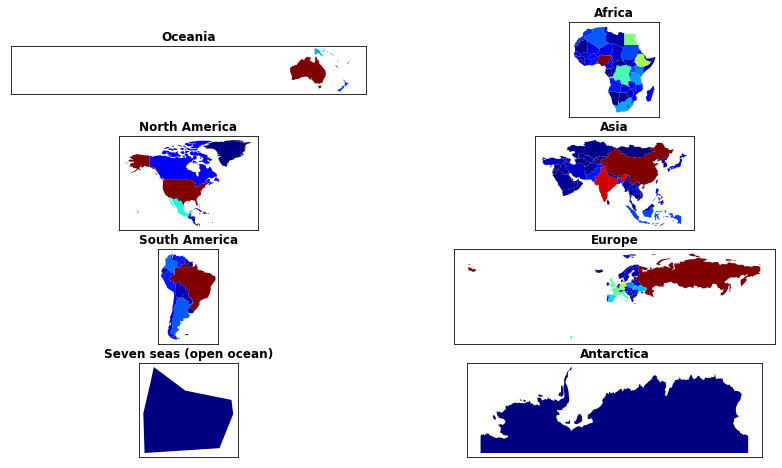

In [6]:
#Let's plot each continent in its own subfigure
#Have 8 continents, including open ocean
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax1 = plt.subplots(4,2, figsize=(14, 8))
       
#Get the continent names:
#Another way to write continents = gdf['continent'].unique()
continents = gdf.continent.unique()


#Now, plot each continent
index = 0

for k in range(4):
    for q in range(2):
        #ax1[k,q].set_aspect('equal')
        
        gdf.loc[gdf['continent'] == continents[index]].plot(ax = ax1[k,q], column = 'pop_est', cmap = 'jet')
        
        #Set some axis stuff
        ax1[k,q].get_xaxis().set_ticks([])
        ax1[k,q].get_yaxis().set_ticks([])
        ax1[k,q].set_title(continents[index], fontweight='bold')
    
        index += 1

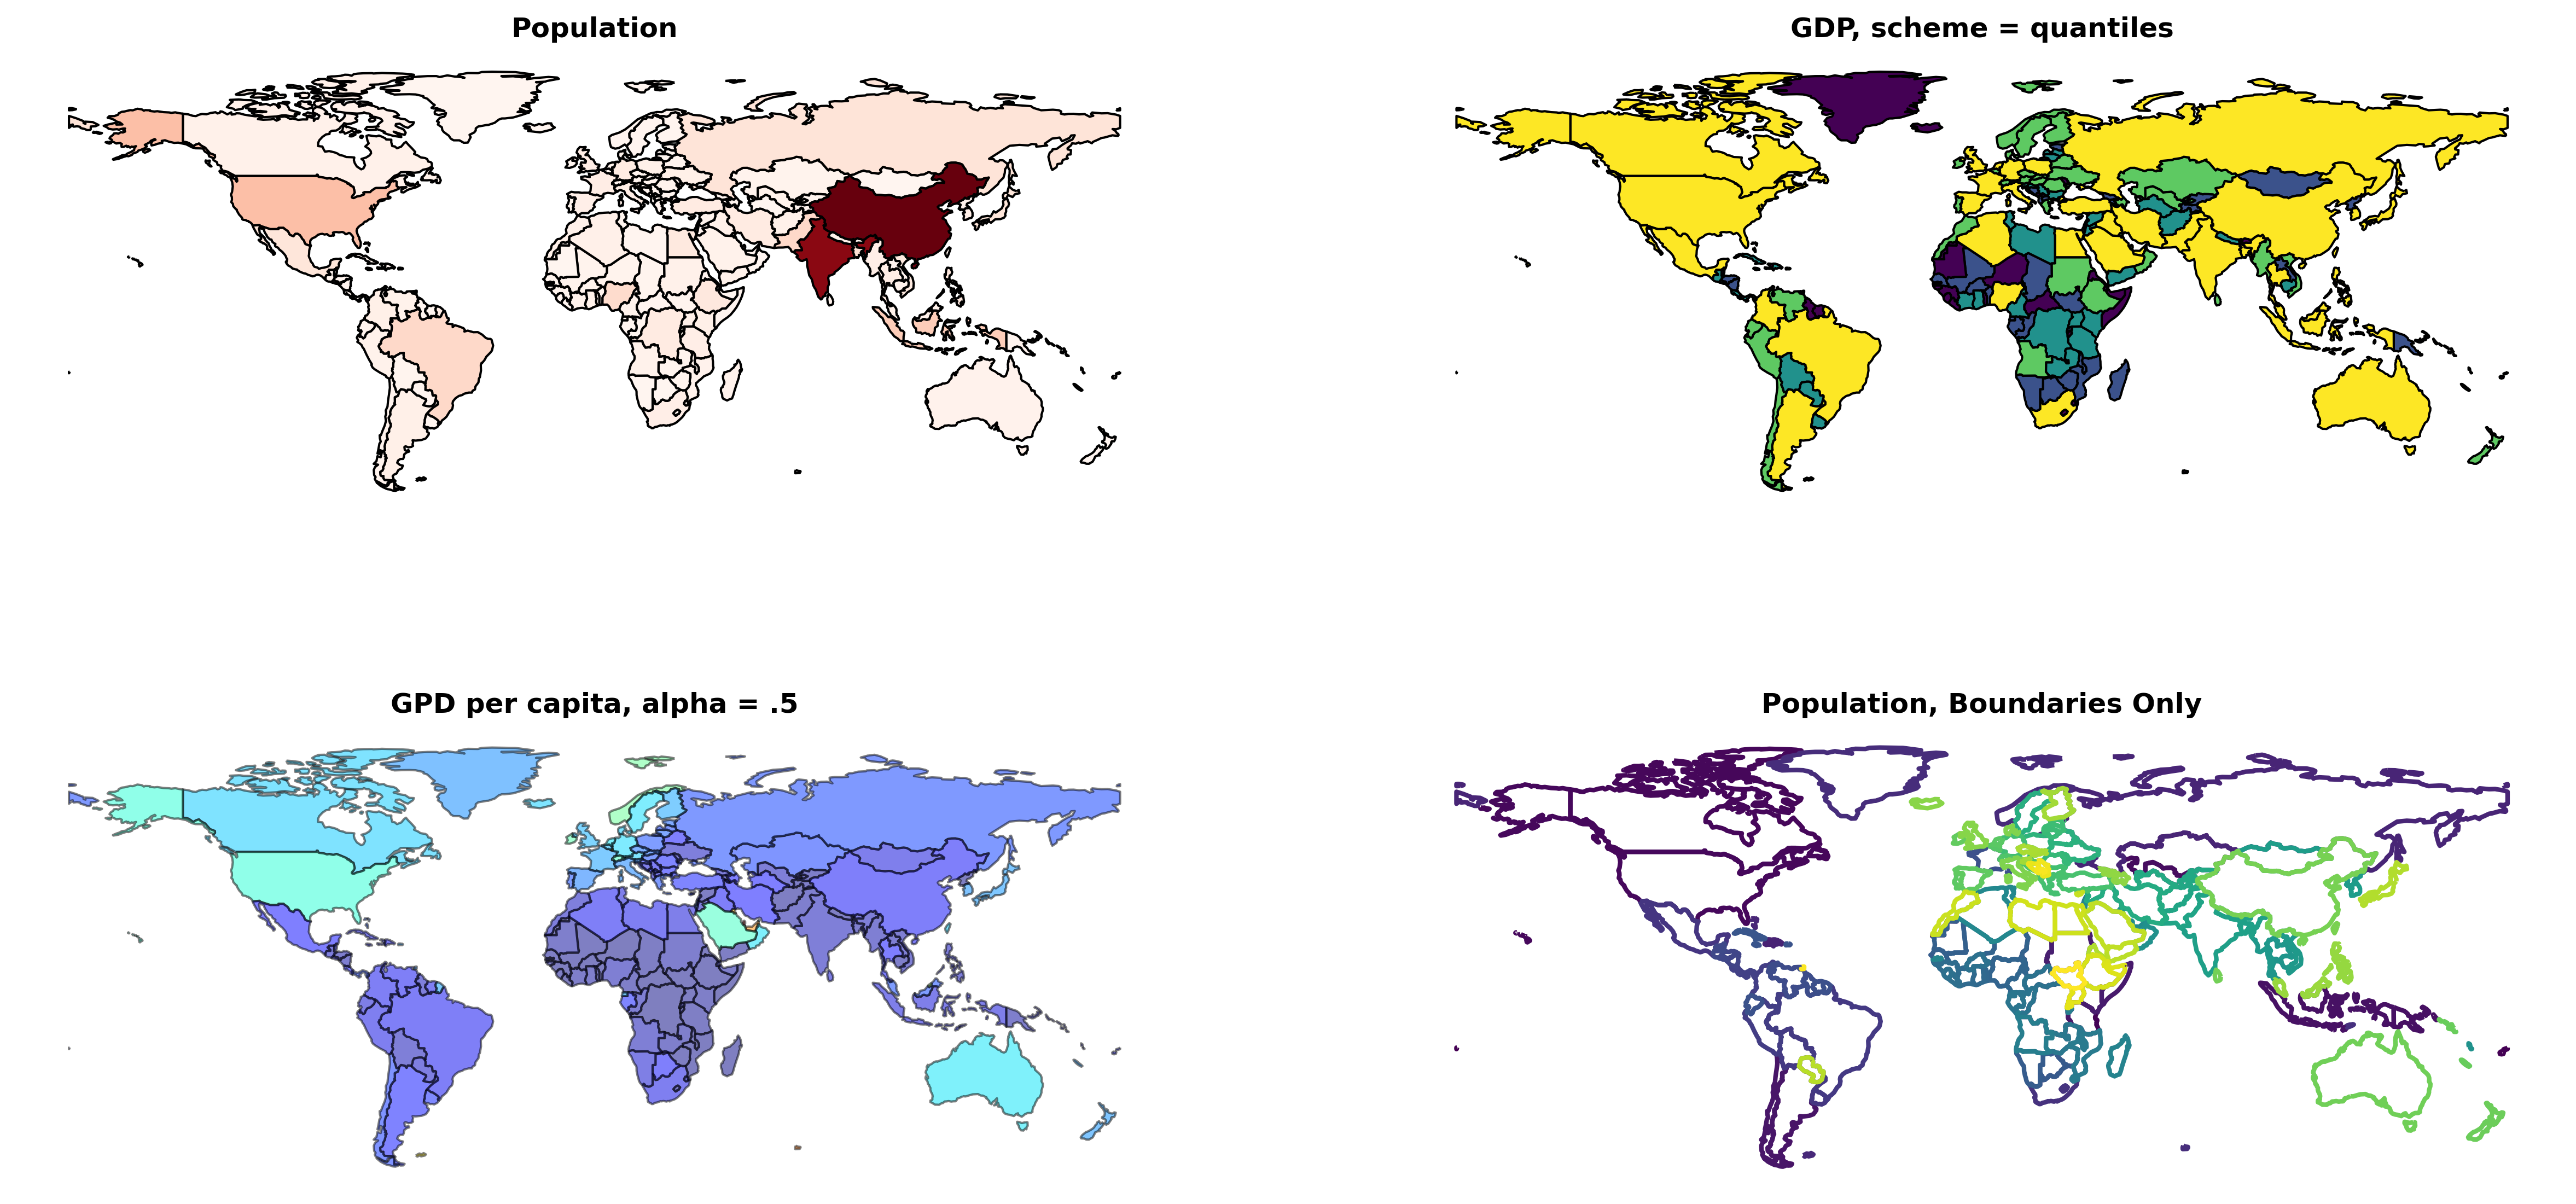

In [7]:
#Some more basic choropleth plots
####################

#Reload gdf again...
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
gdf = gdf.loc[gdf.continent!='Antarctica']

#Make a gpd per capita column:
gdf['gpd_per_cap'] = gdf.gdp_md_est / gdf.pop_est


#Do a bunch of figures!
fig, ax1 = plt.subplots(2,2, figsize=(20, 10), dpi=300)


#Population
#####
gdf.plot(ax = ax1[0,0], column = 'pop_est', linewidth = 1, edgecolor = 'black', cmap = 'Reds')
ax1[0,0].set_title('Population', fontweight='bold')
ax1[0,0].set_axis_off();

#GDP
#####
gdf.plot(ax = ax1[0,1], column = 'gdp_md_est', linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles')
ax1[0,1].set_title('GDP, scheme = quantiles', fontweight='bold')
ax1[0,1].set_axis_off();

#GDP per Capita
#####
gdf.plot(ax = ax1[1,0], column = 'gpd_per_cap', linewidth = 1, edgecolor = 'black', cmap = 'jet', alpha = .5)
ax1[1,0].set_title('GPD per capita, alpha = .5', fontweight='bold')
ax1[1,0].set_axis_off();

#Population, just the Boundaries
#####
gdf.plot(ax = ax1[1,1], facecolor='none', edgecolor='black', linewidth = 2, cmap = 'viridis',
         scheme='quantiles')
ax1[1,1].set_title('Population, Boundaries Only', fontweight='bold')
ax1[1,1].set_axis_off();

<AxesSubplot:>

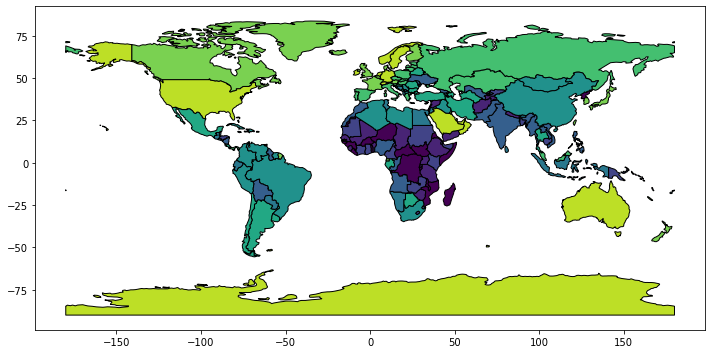

In [12]:
#Note, we don't actually need to create a new column/variable:
#Note also vmax and vmin
#####
gdf.plot(figsize=(12,8), column = gdf.gdp_md_est / gdf.pop_est, linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles', k=10, vmax=10, vmin=0) 

<AxesSubplot:>

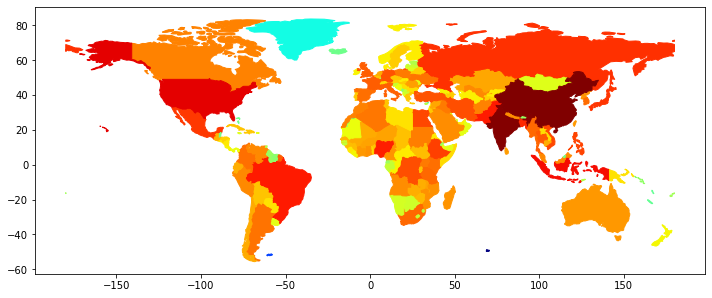

In [38]:
#Log scale
gdf.plot(figsize=(12,8), column = np.log(gdf.pop_est), linewidth = 1, edgecolor = 'face', cmap = 'jet')

### Recall CRS and Centroids

In [40]:
#Plot each country centroid under different CRS
############################

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#First, just look at default CRS:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<ipython-input-41-368a79fa44c4>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf2['centroid_column'] = gdf2.centroid


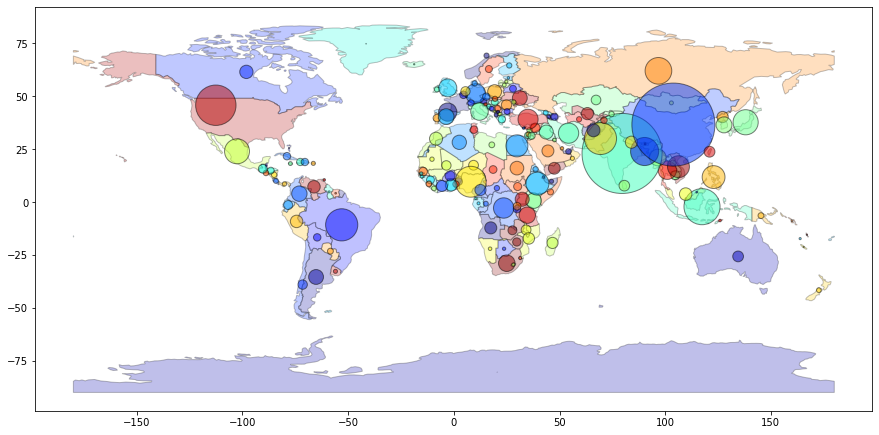

In [41]:
#Now plot with centroids...
####

#Try a few different CRS EPSG codes:
#4326 = Geographic 2D, WGS 84 Daturm
#4269 = Geographic 2D, NAD83 Datum
#3857 = Mercator (Cylindrical projection)
#570 = North American Albers Equal Area (Conic)
#6933 = Equal-Area Cylindrical
#3035 = Lambert Azimuthal Equal Area centered on Europe (Azimuthal/Planar)

#For 5070, filter to just North America
#gdf = gdf.loc[gdf.continent == 'North America']

#gdf = gdf.to_crs(5070) 
display(gdf.crs)


#Copy and get centroids:
gdf2 = gdf.copy()

gdf2['centroid_column'] = gdf2.centroid

#We can set geometry:
gdf2 = gdf2.set_geometry('centroid_column')


fig, my_ax = plt.subplots(1,1, figsize=(15, 10))

#Plot polygons:
######
gdf.plot(ax = my_ax, column = gdf.iso_a3, alpha = .25, linewidth=1, edgecolor = 'black', cmap='jet')

#Plot centroids:
#######
gdf2.plot(ax = my_ax, column = gdf2.iso_a3, markersize = gdf2.pop_est / 2e5, alpha = .5, edgecolor = 'black', cmap='jet');


### Let's add some cities

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


<AxesSubplot:>

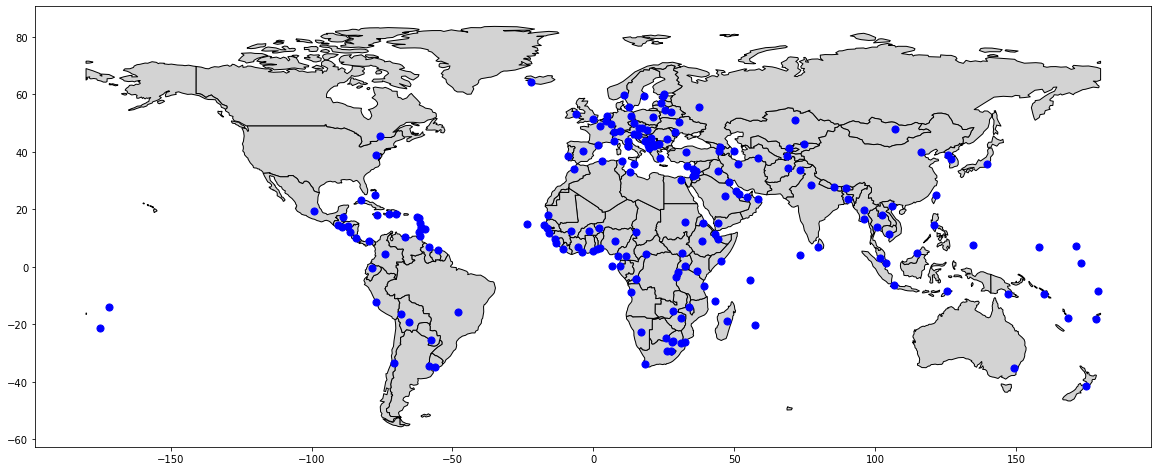

In [8]:

#Get world borders again
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Now, get the cities!
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

#Get rid of Antarctica
world = world.loc[world.continent!='Antarctica']


#Confirm same CRS
display(world.crs)
display(cities.crs)

display(cities.head())


#Plot the cities and country borders
######
fig, ax1 = plt.subplots(1,1, figsize=(20, 10))

#ax1.set_aspect('equal')

#Country backgrounds
world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black') #, zorder=2)

#Cities
#Note: Try changing the zorder for both plots
cities.plot(ax = ax1, markersize = 50, color='blue') #, zorder=1);

#### Make own points/GeoDataFrame

,Name,geometry
0,0,POINT (-93.00000 59.00000)
1,1,POINT (9.00000 -27.00000)
2,2,POINT (-159.00000 -71.00000)
3,3,POINT (123.00000 -67.00000)
4,4,POINT (-86.00000 44.00000)


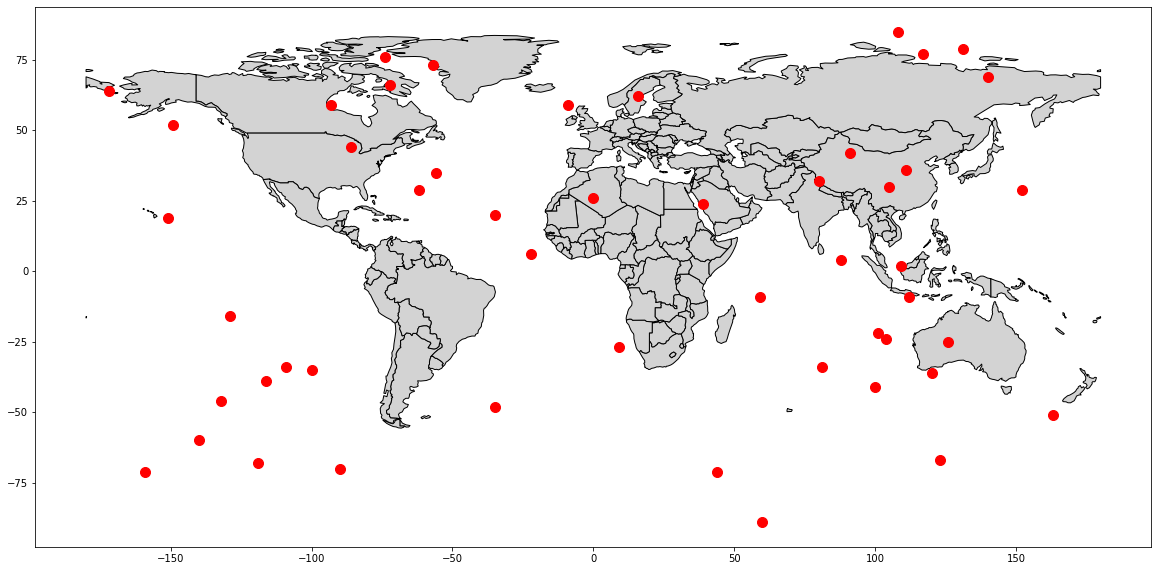

In [44]:
#Make a GeoDataFrame of N random points:
N = 50
df = pd.DataFrame(
    {'Name': [str(k) for k in (list(range(0, N)))],
     'Latitude': np.random.randint(-89, 89, N),
     'Longitude': np.random.randint(-180, 180, N)})

#Create the GeoDataFrame
gdf_point = gpd.GeoDataFrame(df[['Name']], geometry = gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

display(gdf_point.head())


#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(20, 10))

world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_point.plot(ax = ax1, markersize = 100, color='red');

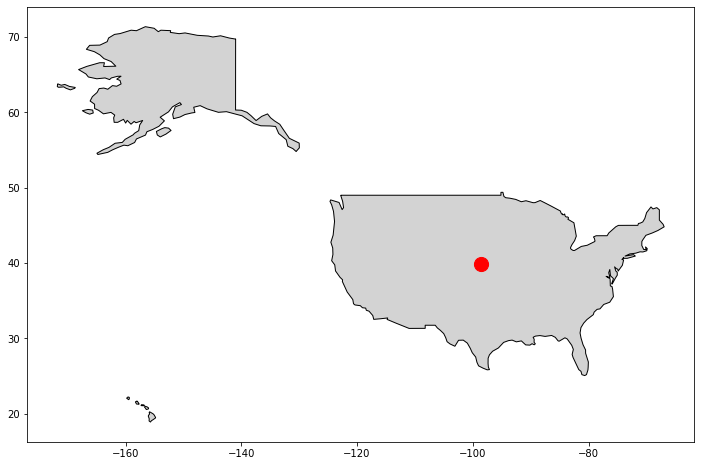

In [45]:
#Make a GeoDataFrame with just a single point at ostensible geographic center of the contiguous US
####39°50′N 98°35
df = pd.DataFrame(
    {'Description': ['Geographic Center'],
     'Latitude': [39 + 50/60],
     'Longitude': [-(98 + 35/60)]})

gdf_point = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")


fig, ax1 = plt.subplots(1,1, figsize=(12, 8))

world.loc[world['iso_a3'] == 'USA'].plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_point.plot(ax = ax1, markersize = 200, color='red');

In [31]:
usa_map = world.loc[world['iso_a3'] == 'USA'].copy()

In [32]:
#Convert to North American Albers:
usa_map = usa_map.to_crs(5070)

<AxesSubplot:>

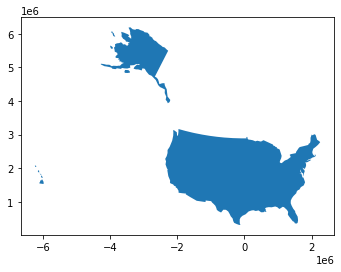

In [33]:
usa_map.plot()

In [68]:
###Let's calculate and visualize the land area needed to generate all US electricity from Solar
#############

#Do everything in kWh

#Approx 2021 US electricity:
US_electricity = 4.116e12

#Solar irradiance, in kWh m-2 over the year
S = 1800

#Our solar efficiency, and a performance factor
E = .18
PF = .75

#Energy over the year for a single square meter:
E_m2 = S * E * PF

#And now, required square meters:
m2_needed = US_electricity / E_m2

#In square miles:
sqmile_needed = m2_needed * 3.86102e-7
sqmile_needed

6539.900543209877

In [53]:
m2_needed

16938271604.938272

In [65]:
#Is this a lot?
Lower48_area = 3.1199e6
US_area = 3.797e6
Maricopa_area = 9223

sqmile_needed / US_area

0.0017223862373478738

C:\Users\Steffen\miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

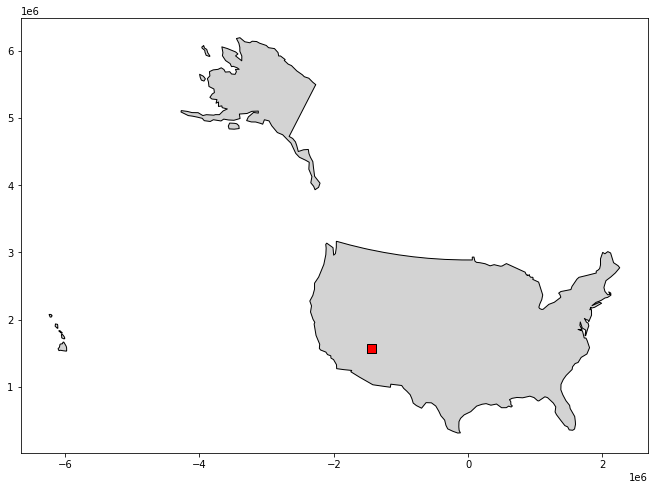

In [69]:
#And let's make a polygon...
from shapely.geometry import Polygon

#Just make a square with the area of m2_needed
val = np.sqrt(m2_needed)

x_base = -1.5e6
y_base = 1.5e6

lon_list = [x_base, x_base+val, x_base+val, x_base]
lat_list = [y_base, y_base, y_base+val, y_base+val]

polygon_geom = Polygon(zip(lon_list, lat_list))

crs = {'init': 'epsg:5070'}
solar_rect = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


fig, ax1 = plt.subplots(1,1, figsize=(12, 8))
usa_map.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
solar_rect.plot(ax = ax1, facecolor = 'red', edgecolor='black')

In [62]:
solar_rect.area.values[0] / usa_map.area.values[0]

0.001781023124536201